# 第4章: 言語解析

問題30から問題35までは、以下の文章`text`（太宰治の『走れメロス』の冒頭部分）に対して、言語解析を実施せよ。問題36から問題39までは、国家を説明した文書群（日本語版ウィキペディア記事から抽出したテキスト群）をコーパスとして、言語解析を実施せよ。

test

In [ ]:
import spacy
nlp = spacy.load("ja_ginza")

doc = nlp("私は、自然言語処理の勉強をしています。")

print("単語数:", len(doc))

for token in doc:
    print(f"単語:{token.text}  pos:{token.pos_},  tag:{token.tag_},  label:{token.dep_}")

単語数: 12
単語:私  pos:PRON,  tag:代名詞,  label:nsubj
単語:は  pos:ADP,  tag:助詞-係助詞,  label:case
単語:、  pos:PUNCT,  tag:補助記号-読点,  label:punct
単語:自然言語処理  pos:PROPN,  tag:名詞-普通名詞-一般,  label:nmod
単語:の  pos:ADP,  tag:助詞-格助詞,  label:case
単語:勉強  pos:NOUN,  tag:名詞-普通名詞-サ変可能,  label:obj
単語:を  pos:ADP,  tag:助詞-格助詞,  label:case
単語:し  pos:VERB,  tag:動詞-非自立可能,  label:ROOT
単語:て  pos:SCONJ,  tag:助詞-接続助詞,  label:mark
単語:い  pos:VERB,  tag:動詞-非自立可能,  label:fixed
単語:ます  pos:AUX,  tag:助動詞,  label:aux
単語:。  pos:PUNCT,  tag:補助記号-句点,  label:punct


In [2]:
text = """
メロスは激怒した。
必ず、かの邪智暴虐の王を除かなければならぬと決意した。
メロスには政治がわからぬ。
メロスは、村の牧人である。
笛を吹き、羊と遊んで暮して来た。
けれども邪悪に対しては、人一倍に敏感であった。
"""

## 30. 動詞
文章`text`に含まれる動詞をすべて表示せよ。

In [ ]:
import spacy
nlp = spacy.load("ja_ginza")

for token in nlp(text):
    if token.pos_ == "VERB":
        print(f"動詞：{token.text}")

動詞:激怒
動詞:邪智
動詞:除か
動詞:なら
動詞:決意
動詞:わから
動詞:ある
動詞:吹き
動詞:遊ん
動詞:暮し
動詞:来
動詞:対し
動詞:あっ


## 31. 動詞の原型
文章`text`に含まれる動詞と、その原型をすべて表示せよ。

In [18]:
import spacy
nlp = spacy.load("ja_ginza")

for token in nlp(text):
    if token.pos_ == "VERB":
        print(f"動詞：{token.text}, 原型：{token.lemma_}")

動詞：激怒, 原型：激怒
動詞：邪智, 原型：邪智
動詞：除か, 原型：除く
動詞：なら, 原型：なる
動詞：決意, 原型：決意
動詞：わから, 原型：わかる
動詞：ある, 原型：ある
動詞：吹き, 原型：吹く
動詞：遊ん, 原型：遊ぶ
動詞：暮し, 原型：暮す
動詞：来, 原型：来る
動詞：対し, 原型：対する
動詞：あっ, 原型：ある


## 32. 「AのB」
文章`text`において、2つの名詞が「の」で連結されている名詞句をすべて抽出せよ。

In [45]:
import spacy
nlp = spacy.load("ja_ginza")
doc = nlp(text)

for token in range(len(doc)-2):
    if doc[token].pos_ == "NOUN" and doc[token+1].text == "の" and doc[token+2].pos_ == "NOUN":
        print(f"{doc[token].text + doc[token+1].text + doc[token+2].text}")
    

暴虐の王
村の牧人


## 33. 係り受け解析

文章`text`に係り受け解析を適用し、係り元と係り先のトークン（形態素や文節などの単位）をタブ区切り形式ですべて抽出せよ。

In [53]:
import spacy
nlp = spacy.load("ja_ginza")
doc = nlp(text)

print("係り元\t係り先")

for token in doc:
    print(f"{token.text}\t{token.head.text}")

係り元	係り先

	メロス
メロス	激怒
は	メロス
激怒	激怒
し	激怒
た	激怒
。	激怒

	

必ず	除か
、	必ず
かの	暴虐
邪智	暴虐
暴虐	王
の	暴虐
王	除か
を	王
除か	決意
なけれ	除か
ば	なけれ
なら	なけれ
ぬ	なけれ
と	除か
決意	決意
し	決意
た	決意
。	決意

	メロス
メロス	わから
に	メロス
は	メロス
政治	わから
が	政治
わから	わから
ぬ	わから
。	わから

	メロス
メロス	牧人
は	メロス
、	メロス
村	牧人
の	村
牧人	牧人
で	牧人
ある	で
。	牧人

	笛
笛	吹き
を	笛
吹き	暮し
、	吹き
羊	遊ん
と	羊
遊ん	暮し
で	遊ん
暮し	暮し
て	暮し
来	て
た	暮し
。	暮し

	邪悪
けれど	

も	

邪悪	敏感
に	邪悪
対し	に
ては	に
、	邪悪
人	倍
一	倍
倍	敏感
に	倍
敏感	敏感
で	敏感
あっ	で
た	敏感
。	敏感

	



## 34. 主述の関係
文章`text`において、「メロス」が主語であるときの述語を抽出せよ。

In [59]:
import spacy
nlp = spacy.load("ja_ginza")
doc = nlp(text)

for token in doc:
    if token.dep_ == "nsubj" and token.text == "メロス":
        print(f"メロスが主語であるときの述語 : {token.head.text}")
        if token.dep_ == "ROOT":
            print(f"メロスが主語であるときの述語 : {doc[token]}")

メロスが主語であるときの述語 : 激怒
メロスが主語であるときの述語 : 牧人


## 35. 係り受け木
「メロスは激怒した。」の係り受け木を可視化せよ。

In [62]:
import spacy
nlp = spacy.load("ja_ginza")

tree_text = "メロスは激怒した。"
doc = nlp(tree_text)

spacy.displacy.render(doc, style="dep", jupyter=True)

In [ ]:
# svg = spacy.displacy.render(doc, style="dep")
# with open("parse_tree.svg", "w", encoding="utf-8") as f:
#     f.write(svg)

## 36. 単語の出現頻度

問題36から39までは、Wikipediaの記事を以下のフォーマットで書き出したファイル[jawiki-country.json.gz](/data/jawiki-country.json.gz)をコーパスと見なし、統計的な分析を行う。

* 1行に1記事の情報がJSON形式で格納される
* 各行には記事名が"title"キーに、記事本文が"text"キーの辞書オブジェクトに格納され、そのオブジェクトがJSON形式で書き出される
* ファイル全体はgzipで圧縮される

まず、第3章の処理内容を参考に、Wikipedia記事からマークアップを除去し、各記事のテキストを抽出せよ。そして、コーパスにおける単語（形態素）の出現頻度を求め、出現頻度の高い20語とその出現頻度を表示せよ。

In [4]:
!wget https://nlp100.github.io/2025/_downloads/ca47e7baf341469cd7b585f97496c020/jawiki-country.json.gz

--2025-11-25 22:48:33--  https://nlp100.github.io/2025/_downloads/ca47e7baf341469cd7b585f97496c020/jawiki-country.json.gz
Resolving nlp100.github.io (nlp100.github.io)... 185.199.111.153, 185.199.109.153, 185.199.108.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5068362 (4.8M) [application/gzip]
Saving to: ‘jawiki-country.json.gz’

jawiki-country.json 100%[===================>]   4.83M  --.-KB/s    in 0.06s   

2025-11-25 22:48:33 (74.4 MB/s) - ‘jawiki-country.json.gz’ saved [5068362/5068362]



In [ ]:
#sample

import json
import re
import spacy
from collections import Counter
from tqdm import tqdm
import gzip

patterns = [
    r"\'{2,5}",                               # 強調
    r"\[\[(?:[^|\]]*?\|)?([^|\]]+?)\]\]",     # 内部リンク
    r"\[(https?://[^ ]+)( [^\]]+)?\]",        # 外部リンク
    r"<[^>]+>",                               # HTMLタグ
    r"\{\{.*?\}\}",                           # テンプレート
]
compiled_pattern = re.compile("|".join(patterns), re.MULTILINE)

def remove_markup(text):
    old_text = ""
    while old_text != text:
        old_text = text
        text = compiled_pattern.sub(lambda m: m.group(1) if m.group(1) else "", text)
    return text

# Sudachi の最大バイト制限に合わせた分割

def split_text_by_bytes(text, max_bytes=49149):
    encoded = text.encode("utf-8")
    if len(encoded) <= max_bytes:
        return [text]

    chunks = []
    for i in range(0, len(encoded), max_bytes):
        chunk = encoded[i:i + max_bytes]
        chunks.append(chunk.decode("utf-8", errors="ignore"))
    return chunks


nlp = spacy.load("ja_ginza")
nlp.disable_pipes("ner", "parser")   # ← 必須（高速化）

target_pos = {"NOUN", "VERB", "ADJ", "ADV"}
freq = Counter()


def main():
    with gzip.open("jawiki-country.json.gz", "rt") as f:

        # Wikipedia の行数は多いので tqdm
        for line in tqdm(f, desc="Running"):

            data = json.loads(line)
            cleaned = remove_markup(data["text"])
            chunks = split_text_by_bytes(cleaned)

            # GiNZA に渡す（逐次）
            for doc in nlp.pipe(chunks, batch_size=128):
                for token in doc:
                    if token.pos_ in target_pos:
                        freq[token.lemma_] += 1

    # Top 20
    print("word\tcount")
    for word, count in freq.most_common(20):
        print(f"{word}\t{count}")

if __name__ == "__main__":
    main()


記事処理中: 248it [05:40,  1.37s/it]


--- Top 20 Words ---
年	27900
いる	17103
ある	17091
月	11892
日	7762


	7534
なる	7384
よる	7280
人	6465
する	4635
%	4622
こと	4552
世界	3569
語	3263
|	3051
ため	3045
政府	3032
島	3024
第	3017
大統領	2938


In [ ]:
import re
import spacy
from collections import Counter
from tqdm import tqdm
import gzip


re_quote = re.compile(r"'{2,5}")
re_link = re.compile(r"\[\[(?:[^|\]]*\|)?([^|\]]+)\]\]")
re_ref_tag = re.compile(r"<[^>]+>")
re_ext_link = re.compile(r"\[https?://[^\s]+\s+([^\]]+)\]")
re_template = re.compile(r"\{\{[^{}]*\}\}")

# re_template = re.compile(r"\{\{.*?\}\}") 

def clean_markup(text):
    text = re_quote.sub("", text)
    text = re_link.sub(r"\1", text)
    text = re_ref_tag.sub("", text)
    text = re_ext_link.sub(r"\1", text)
    text = re_template.sub("", text)
    return text

# Sudachi の最大バイト制限に合わせた分割
# SudachiError: "Error during tokenization": Input is too long, it can't be more than 49149 bytes, was 67061 に合わせた．
MAX_BYTES = 49149

def split_text_by_bytes(text, max_bytes=MAX_BYTES):
    encoded = text.encode("utf-8")
    if len(encoded) <= max_bytes:
        return [text] if text else []

    chunks = []
    for i in range(0, len(encoded), max_bytes):
        chunk = encoded[i:i + max_bytes]
        # errors="ignore" で不完全な末端文字を切る（安全策）
        decoded = chunk.decode("utf-8", errors="ignore")
        if decoded:
            chunks.append(decoded)
    return chunks


nlp = spacy.load("ja_ginza")
# 解析だけ使うなら重い処理を止める
nlp.disable_pipes("ner", "parser")

target_pos = {"NOUN", "VERB", "ADJ", "ADV"}
freq = Counter()


def main():
    with gzip.open("jawiki-country.json.gz", "rt", encoding="utf-8") as f:
        for line in tqdm(f, desc="Running"):
            line = line.strip()
            if not line:
                continue
            data = json.loads(line)

            text = data.get("text", "")
            if not text:
                continue

            cleaned = clean_markup(text)
            chunks = split_text_by_bytes(cleaned)

            # GiNZA に渡す（逐次）
            for doc in nlp.pipe(chunks, batch_size=128):
                for token in doc:
                    if token.pos_ in target_pos:
                        lemma = token.lemma_.strip()
                        if lemma:
                            freq[lemma] += 1

    print("word\tcount")
    for word, count in freq.most_common(20):
        print(f"{word}\t{count}")

if __name__ == "__main__":
    main()

Running: 248it [04:26,  1.08s/it]

word	count
年	28240
いる	17192
ある	17149
月	11930
日	7819
なる	7420
よる	7319
人	6572
する	4669
%	4623
こと	4576
世界	3639
政府	3376
語	3283
国	3105
第	3096
ため	3062
大統領	3057
島	3034
|	3003


上記の実行だと，メモリ不足になった．
メモリ不足解消法：
1.先にコンパイルをする．
2.解析に不要なものを除く．

re_template = re.compile(r"\{\{[^{}]*\}\}")なし.ver（失敗例）

In [19]:
import json
import re
import spacy
from collections import Counter
import gzip

# --- マークアップ除去用の正規表現 ---
re_quote = re.compile(r"'{2,5}")
re_link = re.compile(r"\[\[(?:[^|\]]*\|)?([^|\]]+)\]\]")
re_ref_tag = re.compile(r"<[^>]+>")
re_ext_link = re.compile(r"\[https?://[^\s]+\s+([^\]]+)\]")

def clean_markup(text):
    text = re_quote.sub("", text)
    text = re_link.sub(r"\1", text)
    text = re_ref_tag.sub("", text)
    text = re_ext_link.sub(r"\1", text)
    return text

# --- Sudachi の最大バイト制限に合わせて分割 ---
def split_text_by_bytes(text, max_bytes=49149):
    encoded = text.encode("utf-8")
    if len(encoded) <= max_bytes:
        return [text]

    chunks = []
    for i in range(0, len(encoded), max_bytes):
        chunk = encoded[i:i+max_bytes].decode("utf-8", errors="ignore")
        chunks.append(chunk)
    return chunks

# --- 全記事のクリーンテキストをリストに保持 ---
texts_for_nlp = []  # ← chunk済テキストを入れる（変更ポイント）

with gzip.open("jawiki-country.json.gz", "rt", encoding="utf-8") as f:
    for line in f:
        data = json.loads(line)
        cleaned = clean_markup(data["text"])
        chunks = split_text_by_bytes(cleaned)   # ← Sudachi対策
        texts_for_nlp.extend(chunks)            # ← chunked text をすべて追加

# --- spaCy(GiNZA) の準備 ---
nlp = spacy.load("ja_ginza")
nlp.disable_pipes("ner", "parser")

# --- 出現頻度カウント ---
freq = Counter()

for doc in nlp.pipe(texts_for_nlp, batch_size=50):
    for token in doc:
        if token.pos_ not in ("PUNCT", "SPACE"):
            surface = token.lemma_.strip()
            if surface:
                freq[surface] += 1

# --- Top20 出力 ---
print("--- Top 20 Words ---")
for word, count in freq.most_common(20):
    print(f"{word}: {count}")

--- Top 20 Words ---
|: 108495
の: 95910
=: 95192
に: 58121
する: 52364
は: 52026
}: 46943
が: 44298
を: 39259
て: 36148
た: 35952
と: 35152
年: 30555
-: 29827
だ: 26911
・: 24673
で: 21932
/: 21323
れる: 18416
いる: 17302


## 37. 名詞の出現頻度
コーパスにおける名詞の出現頻度を求め、出現頻度の高い20語とその出現頻度を表示せよ。

In [2]:
import json
import re
import spacy
from collections import Counter
from tqdm import tqdm
import gzip


re_quote = re.compile(r"'{2,5}")
re_link = re.compile(r"\[\[(?:[^|\]]*\|)?([^|\]]+)\]\]")
re_ref_tag = re.compile(r"<[^>]+>")
re_ext_link = re.compile(r"\[https?://[^\s]+\s+([^\]]+)\]")
re_template = re.compile(r"\{\{[^{}]*\}\}")

# re_template = re.compile(r"\{\{.*?\}\}") 

def clean_markup(text):
    text = re_quote.sub("", text)
    text = re_link.sub(r"\1", text)
    text = re_ref_tag.sub("", text)
    text = re_ext_link.sub(r"\1", text)
    text = re_template.sub("", text)
    return text

# Sudachi の最大バイト制限に合わせた分割
# SudachiError: "Error during tokenization": Input is too long, it can't be more than 49149 bytes, was 67061 に合わせた．
MAX_BYTES = 49149

def split_text_by_bytes(text, max_bytes=MAX_BYTES):
    encoded = text.encode("utf-8")
    if len(encoded) <= max_bytes:
        return [text] if text else []

    chunks = []
    for i in range(0, len(encoded), max_bytes):
        chunk = encoded[i:i + max_bytes]
        # errors="ignore" で不完全な末端文字を切る（安全策）
        decoded = chunk.decode("utf-8", errors="ignore")
        if decoded:
            chunks.append(decoded)
    return chunks


nlp = spacy.load("ja_ginza")
# 解析だけ使うなら重い処理を止める
nlp.disable_pipes("ner", "parser")

target_pos = {"NOUN"}
freq = Counter()


def main():
    with gzip.open("jawiki-country.json.gz", "rt", encoding="utf-8") as f:
        for line in tqdm(f, desc="Running"):
            line = line.strip()
            if not line:
                continue
            data = json.loads(line)

            text = data.get("text", "")
            if not text:
                continue

            cleaned = clean_markup(text)
            chunks = split_text_by_bytes(cleaned)

            # GiNZA に渡す（逐次）
            for doc in nlp.pipe(chunks, batch_size=128):
                for token in doc:
                    if token.pos_ in target_pos:
                        lemma = token.lemma_.strip()
                        if lemma:
                            freq[lemma] += 1

    print("word\tcount")
    for word, count in freq.most_common(20):
        print(f"{word}\t{count}")

if __name__ == "__main__":
    main()

Running: 248it [04:17,  1.04s/it]

word	count
年	28240
月	11930
日	7818
人	6572
%	4622
こと	4576
世界	3639
政府	3374
語	3283
国	3105
第	3096
ため	3062
大統領	3055
島	3034
|	2949
ファイル	2436
経済	2313
人口	2257
GDP	2238
後	2206


## 38. TF・IDF
日本に関する記事における名詞のTF・IDFスコアを求め、TF・IDFスコア上位20語とそのTF, IDF, TF・IDFを表示せよ。

In [6]:
import json
import re
import math
import spacy
from collections import Counter
from tqdm import tqdm
import gzip

re_quote = re.compile(r"'{2,5}")
re_link = re.compile(r"\[\[(?:[^|\]]*\|)?([^|\]]+)\]\]")
re_ref_tag = re.compile(r"<[^>]+>")
re_ext_link = re.compile(r"\[https?://[^\s]+\s+([^\]]+)\]")
re_template = re.compile(r"\{\{[^{}]*\}\}")

def clean_markup(text):
    text = re_quote.sub("", text)
    text = re_link.sub(r"\1", text)
    text = re_ref_tag.sub("", text)
    text = re_ext_link.sub(r"\1", text)
    text = re_template.sub("", text)
    return text

MAX_BYTES = 49149

def split_text_by_bytes(text, max_bytes=MAX_BYTES):
    encoded = text.encode("utf-8")
    if len(encoded) <= max_bytes:
        return [text] if text else []

    chunks = []
    for i in range(0, len(encoded), max_bytes):
        chunk = encoded[i:i + max_bytes]
        decoded = chunk.decode("utf-8", errors="ignore")
        if decoded:
            chunks.append(decoded)
    return chunks

nlp = spacy.load("ja_ginza")
nlp.disable_pipes("ner", "parser")

# target_pos = {"NOUN"}
df = Counter()       # 名詞ごとのドキュメント頻度
tf = Counter()       # 日本記事の TF
N = 0                # 全記事数


with gzip.open("jawiki-country.json.gz", "rt", encoding="utf-8") as f:
    for line in tqdm(f):
        data = json.loads(line)
        title = data.get("title", "")
        text = data.get("text", "")
        if not text:
            continue

        N += 1  # 記事数カウント

        cleaned = clean_markup(text)
        chunks = split_text_by_bytes(cleaned)

        seen = set()  # DF 用：この記事に出た名詞

        for doc in nlp.pipe(chunks, batch_size=128):
            for token in doc:
                if token.pos_ == "NOUN":
                    lemma = token.lemma_.strip()
                    if lemma:
                        seen.add(lemma)

        # DF 更新
        for lemma in seen:
            df[lemma] += 1

        # 「日本の記事」なら TF をとる 
        if "日本" in title:
            for doc in nlp.pipe(chunks, batch_size=128):
                for token in doc:
                    if token.pos_ == "NOUN":
                        lemma = token.lemma_.strip()
                        if lemma:
                            tf[lemma] += 1


tfidf = {}
for word, t in tf.items():
    idf = math.log(N / df[word])
    tfidf[word] = t * idf

print("word\tTF\tIDF\tTF-IDF")
for word, score in sorted(tfidf.items(), key=lambda x: x[1], reverse=True)[:20]:
    idf = math.log(N / df[word])
    print(f"{word}\t{tf[word]}\t{idf:.4f}\t{score:.4f}")


248it [04:24,  1.07s/it]

word	TF	IDF	TF-IDF
天皇	69	2.7408	189.1180
倭国	34	4.8203	163.8896
列島	43	2.9485	126.7846
倭	26	4.8203	125.3273
日本書紀	22	5.5134	121.2954
大日本	32	2.9485	94.3513
千島	18	4.8203	86.7651
史学	18	4.8203	86.7651
律令	14	5.5134	77.1880
都道府県	17	4.4148	75.0519
秒	17	4.4148	75.0519
国号	32	2.2553	72.1706
頁	58	1.1959	69.3646
幕府	19	3.4340	65.2458
三省堂	12	4.8203	57.8434
古墳	12	4.8203	57.8434
政令指定都市	12	4.4148	52.9778
日本人	44	1.1440	50.3352
日の本	9	5.5134	49.6209
唐書	9	5.5134	49.6209


## 39. Zipfの法則
コーパスにおける単語の出現頻度順位を横軸、その出現頻度を縦軸として、両対数グラフをプロットせよ。

Processing Wikipedia corpus...


248it [04:22,  1.06s/it]


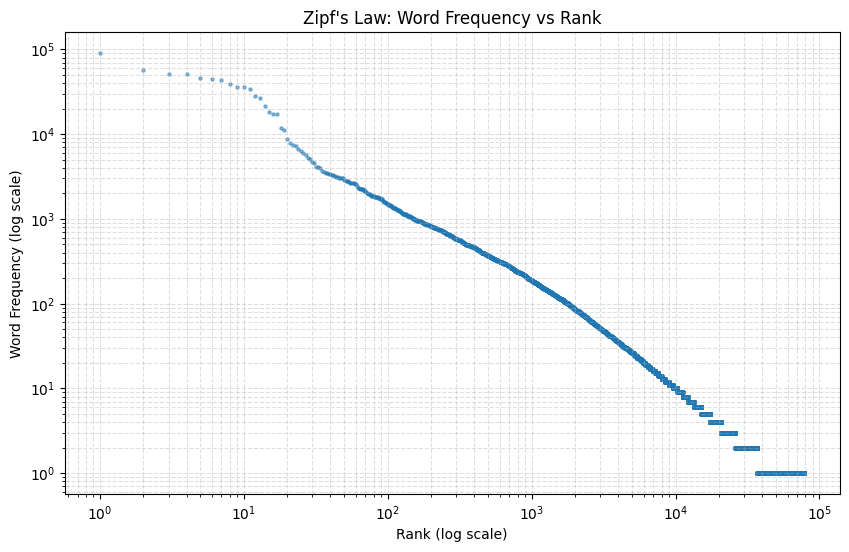

In [20]:
import json
import re
import gzip
from collections import Counter
import spacy
from tqdm import tqdm
import matplotlib.pyplot as plt

re_quote = re.compile(r"'{2,5}")
re_link = re.compile(r"\[\[(?:[^|\]]*\|)?([^|\]]+)\]\]")
re_tag = re.compile(r"<[^>]+>")
re_ext_link = re.compile(r"\[https?://[^\s]+\s+([^\]]+)\]")
re_template = re.compile(r"\{\{[^{}]*\}\}")

def clean_markup(text):
    text = re_quote.sub("", text)
    text = re_link.sub(r"\1", text)
    text = re_tag.sub("", text)
    text = re_ext_link.sub(r"\1", text)
    text = re_template.sub("", text)
    return text

MAX_BYTES = 49149   

def split_text_by_bytes(text, max_bytes=MAX_BYTES):
    encoded = text.encode("utf-8")
    if len(encoded) <= max_bytes:
        return [text] if text else []

    chunks = []
    for i in range(0, len(encoded), max_bytes):
        chunk = encoded[i:i + max_bytes]
        decoded = chunk.decode("utf-8", errors="ignore")
        if decoded:
            chunks.append(decoded)
    return chunks

nlp = spacy.load("ja_ginza")
nlp.disable_pipes("ner", "parser")  


freq = Counter()

print("Processing Wikipedia corpus...")
with gzip.open("jawiki-country.json.gz", "rt", encoding="utf-8") as f:
    for line in tqdm(f):
        data = json.loads(line)
        text = data.get("text", "")
        if not text:
            continue
        
        cleaned = clean_markup(text)
        chunks = split_text_by_bytes(cleaned)  # 必要

        for doc in nlp.pipe(chunks, batch_size=128):
            for token in doc:
                if token.pos_ not in ("PUNCT", "SPACE", "SYM"):
                    lemma = token.lemma_.strip()
                    if lemma:
                        freq[lemma] += 1


counts = [c for w, c in freq.most_common()]
ranks = range(1, len(counts) + 1)


plt.figure(figsize=(10, 6))
plt.scatter(ranks, counts, s=5, alpha=0.5)

plt.xscale("log")
plt.yscale("log")

plt.title("Zipf's Law: Word Frequency vs Rank")
plt.xlabel("Rank (log scale)")
plt.ylabel("Word Frequency (log scale)")
plt.grid(True, which="both", ls="--", alpha=0.4)

plt.show()
